<a href="https://colab.research.google.com/github/swathimurikipudi/Analyzing-The-Performance-Efficiency-of-The-Radisson-Hotel-Using-Data-Visualization/blob/main/radissonhotels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv

# Data Preprocessing
import re
import string
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk as nlp
import nltk.corpus
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.util import everygrams
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import pickle as pk
from scipy import sparse as sp

# Text Manipulation
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

# For general visualizations / text analysis
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from wordcloud import WordCloud
import plotly.express as px
import plotly.figure_factory as ff
plt.style.use('fivethirtyeight')

# For classification and sentiment analysis
from textblob import TextBlob
from sklearn import feature_extraction, linear_model, model_selection, preprocessing, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss, accuracy_score, precision_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.isnull().sum()

Unnamed: 0       0
Country          0
Date             0
Rating           0
Travel Status    0
Review           0
YDate            0
MDate            0
Review_clean     1
Subjectivity     0
Polarity         0
Sentiment        0
Analysis         0
SentimentML      0
dtype: int64

DATA PREPROCESSING

In [ ]:
# Change the datatype of Date and Feature it into Year and Month
import datetime

df['Date'] = pd.to_datetime(df['Date'])

df['YDate'], df['MDate'] = df['Date'].dt.year, df['Date'].dt.month

df

,Unnamed: 0,Country,Date,Rating,Travel Status,Review,YDate,MDate,Review_clean,Subjectivity,Polarity,Sentiment,Analysis,SentimentML
0,0,Singapore,2020-02-28,5,Solo,"Great location, comfortable and clean room, qu...",2020,2,great location comfortable clean room quiet ye...,0.580556,0.394444,Positive,1,Positive
1,1,Singapore,2020-02-27,5,Business,Stayed at the Sunway Pyramid Hotel for 3 night...,2020,2,stayed sunway pyramid hotel night february roo...,0.377273,0.568182,Positive,1,Positive
2,2,Mauritius,2020-02-27,4,Business,"Great for couples, families or just a business...",2020,2,great couple family business trip area,0.750000,0.800000,Positive,1,Positive
3,3,Singapore,2020-02-25,5,Friends,The rooms are newly renovated with great furni...,2020,2,room newly renovated great furnishing workmans...,0.438026,0.228208,Positive,1,Positive
4,4,Brunei,2020-02-25,5,Friends,Everything you need is within close proximity ...,2020,2,everything need within close proximity area co...,0.500000,0.375000,Positive,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,1970,Philippines,2019-03-01,5,Business,Front Desk needs a little bit more warmthÂ,2019,3,front desk need little bit warmth,0.500000,-0.187500,Negative,-1,Negative
1971,1971,Philippines,2019-03-01,5,Business,Airport shuttle services shows 90MYR but was a...,2019,3,airport shuttle service show myr actually quot...,0.340000,0.240000,Positive,1,Positive
1972,1972,Philippines,2019-03-01,5,Business,Gym is a bit small but has enough equipment to...,2019,3,gym bit small enough equipment get workout war...,0.550000,0.025000,Positive,1,Positive
1973,1973,Philippines,2019-03-01,5,Business,Hotel was still on soft opening and swimming p...,2019,3,hotel still soft opening swimming pool still c...,0.350000,0.100000,Positive,1,Positive


In [ ]:
# Investigate all the elements whithin each Feature
#How many unique values are they , and what are they  ?

#efficient and scalable way
for column in df:
    unique_values = np.unique(df[column])
    unique_count = len(unique_values)
    if unique_count <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, unique_count, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, unique_count))

The number of values for feature Unnamed: 0 is: 1975
The number of values for feature Country is: 46
The number of values for feature Date is: 467
The number of values for feature Rating is: 5 -- [1 2 3 4 5]
The number of values for feature Travel Status is: 5 -- ['Business' 'Couple' 'Family' 'Friends' 'Solo']
The number of values for feature Review is: 1972
The number of values for feature YDate is: 3 -- [2018 2019 2020]
The number of values for feature MDate is: 12


TypeError: ignored

In [ ]:
#convert text to lowercase
#removing numbers
#removing punctuation
#removing stop words
#Lemmatization
#filter out single characters
cleaned_reviews_list = []
for cleaned_reviews in df.Review:
    cleaned_reviews = re.sub("[^a-zA-Z]", " ", cleaned_reviews)
    cleaned_reviews = cleaned_reviews.lower()
    cleaned_reviews = nltk.word_tokenize(cleaned_reviews)
    cleaned_reviews = [word for word in cleaned_reviews if not word in
                    set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    cleaned_reviews = [lemma.lemmatize(word) for word in cleaned_reviews]
    cleaned_reviews = " ".join(w for w in cleaned_reviews if len(w) > 1)
    cleaned_reviews_list.append(cleaned_reviews)

In [ ]:
# Save and display data in new column
df["Review_clean"] = cleaned_reviews_list
df.head(10)

,Unnamed: 0,Country,Date,Rating,Travel Status,Review,YDate,MDate,Review_clean,Subjectivity,Polarity,Sentiment,Analysis,SentimentML
0,0,Singapore,2020-02-28,5,Solo,"Great location, comfortable and clean room, qu...",2020,2,great location comfortable clean room quiet ye...,0.580556,0.394444,Positive,1,Positive
1,1,Singapore,2020-02-27,5,Business,Stayed at the Sunway Pyramid Hotel for 3 night...,2020,2,stayed sunway pyramid hotel night february roo...,0.377273,0.568182,Positive,1,Positive
2,2,Mauritius,2020-02-27,4,Business,"Great for couples, families or just a business...",2020,2,great couple family business trip area,0.750000,0.800000,Positive,1,Positive
3,3,Singapore,2020-02-25,5,Friends,The rooms are newly renovated with great furni...,2020,2,room newly renovated great furnishing workmans...,0.438026,0.228208,Positive,1,Positive
4,4,Brunei,2020-02-25,5,Friends,Everything you need is within close proximity ...,2020,2,everything need within close proximity area co...,0.500000,0.375000,Positive,1,Positive
5,5,Brunei,2020-02-24,5,Friends,Very convenient. You don't have to go out of t...,2020,2,convenient go hotel connected mall activity fo...,0.712500,0.304167,Positive,1,Positive
6,6,Malaysia,2020-02-24,4,Business,"Helpful staff, great hospitality n room was we...",2020,2,helpful staff great hospitality room well main...,0.548333,0.426667,Positive,1,Positive
7,7,Malaysia,2020-02-23,1,Solo,New building with poor service and unfriendly ...,2020,2,new building poor service unfriendly manager,0.527273,-0.131818,Negative,-1,Negative
8,8,Malaysia,2020-02-23,4,Solo,No late checkout option even if you checkin at...,2020,2,late checkout option even checkin,0.600000,-0.300000,Negative,-1,Negative
9,9,Mauritius,2020-02-23,4,Solo,Now friendly staff,2020,2,friendly staff,0.500000,0.375000,Positive,1,Positive


In [ ]:
# Removing whitespaces by splitting Review_clean for counter
def split_name(Review_clean):
    split = str(Review_clean).split()
    return split

# Store the data in a list for text visualization
reviews_count_list = []
for x in cleaned_reviews_list:
    for y in split_name(x):
        reviews_count_list.append(y)

SENTIMENT DATA PREPARATION

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(Review_clean):
  return TextBlob(Review_clean).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(Review_clean):
  return TextBlob(Review_clean).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Review_clean'].apply(getSubjectivity)
df['Polarity'] = df['Review_clean'].apply(getPolarity)

# Show the new dataframe with the new columns
df.head(10)


,Unnamed: 0,Country,Date,Rating,Travel Status,Review,YDate,MDate,Review_clean,Subjectivity,Polarity,Sentiment,Analysis,SentimentML
0,0,Singapore,2020-02-28,5,Solo,"Great location, comfortable and clean room, qu...",2020,2,great location comfortable clean room quiet ye...,0.580556,0.394444,Positive,1,Positive
1,1,Singapore,2020-02-27,5,Business,Stayed at the Sunway Pyramid Hotel for 3 night...,2020,2,stayed sunway pyramid hotel night february roo...,0.377273,0.568182,Positive,1,Positive
2,2,Mauritius,2020-02-27,4,Business,"Great for couples, families or just a business...",2020,2,great couple family business trip area,0.750000,0.800000,Positive,1,Positive
3,3,Singapore,2020-02-25,5,Friends,The rooms are newly renovated with great furni...,2020,2,room newly renovated great furnishing workmans...,0.438026,0.228208,Positive,1,Positive
4,4,Brunei,2020-02-25,5,Friends,Everything you need is within close proximity ...,2020,2,everything need within close proximity area co...,0.500000,0.375000,Positive,1,Positive
5,5,Brunei,2020-02-24,5,Friends,Very convenient. You don't have to go out of t...,2020,2,convenient go hotel connected mall activity fo...,0.712500,0.304167,Positive,1,Positive
6,6,Malaysia,2020-02-24,4,Business,"Helpful staff, great hospitality n room was we...",2020,2,helpful staff great hospitality room well main...,0.548333,0.426667,Positive,1,Positive
7,7,Malaysia,2020-02-23,1,Solo,New building with poor service and unfriendly ...,2020,2,new building poor service unfriendly manager,0.527273,-0.131818,Negative,-1,Negative
8,8,Malaysia,2020-02-23,4,Solo,No late checkout option even if you checkin at...,2020,2,late checkout option even checkin,0.600000,-0.300000,Negative,-1,Negative
9,9,Mauritius,2020-02-23,4,Solo,Now friendly staff,2020,2,friendly staff,0.500000,0.375000,Positive,1,Positive


In [ ]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

df['Sentiment'] = df['Polarity'].apply(getAnalysis)

df.head(10)


,Unnamed: 0,Country,Date,Rating,Travel Status,Review,YDate,MDate,Review_clean,Subjectivity,Polarity,Sentiment,Analysis,SentimentML
0,0,Singapore,2020-02-28,5,Solo,"Great location, comfortable and clean room, qu...",2020,2,great location comfortable clean room quiet ye...,0.580556,0.394444,Positive,1,Positive
1,1,Singapore,2020-02-27,5,Business,Stayed at the Sunway Pyramid Hotel for 3 night...,2020,2,stayed sunway pyramid hotel night february roo...,0.377273,0.568182,Positive,1,Positive
2,2,Mauritius,2020-02-27,4,Business,"Great for couples, families or just a business...",2020,2,great couple family business trip area,0.750000,0.800000,Positive,1,Positive
3,3,Singapore,2020-02-25,5,Friends,The rooms are newly renovated with great furni...,2020,2,room newly renovated great furnishing workmans...,0.438026,0.228208,Positive,1,Positive
4,4,Brunei,2020-02-25,5,Friends,Everything you need is within close proximity ...,2020,2,everything need within close proximity area co...,0.500000,0.375000,Positive,1,Positive
5,5,Brunei,2020-02-24,5,Friends,Very convenient. You don't have to go out of t...,2020,2,convenient go hotel connected mall activity fo...,0.712500,0.304167,Positive,1,Positive
6,6,Malaysia,2020-02-24,4,Business,"Helpful staff, great hospitality n room was we...",2020,2,helpful staff great hospitality room well main...,0.548333,0.426667,Positive,1,Positive
7,7,Malaysia,2020-02-23,1,Solo,New building with poor service and unfriendly ...,2020,2,new building poor service unfriendly manager,0.527273,-0.131818,Negative,-1,Negative
8,8,Malaysia,2020-02-23,4,Solo,No late checkout option even if you checkin at...,2020,2,late checkout option even checkin,0.600000,-0.300000,Negative,-1,Negative
9,9,Mauritius,2020-02-23,4,Solo,Now friendly staff,2020,2,friendly staff,0.500000,0.375000,Positive,1,Positive


In [ ]:

# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return -1 #negative
  elif score == 0:
    return 0 #neutral
  else:
    return 1 #positive

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head(10)

,Unnamed: 0,Country,Date,Rating,Travel Status,Review,YDate,MDate,Review_clean,Subjectivity,Polarity,Sentiment,Analysis,SentimentML
0,0,Singapore,2020-02-28,5,Solo,"Great location, comfortable and clean room, qu...",2020,2,great location comfortable clean room quiet ye...,0.580556,0.394444,Positive,1,Positive
1,1,Singapore,2020-02-27,5,Business,Stayed at the Sunway Pyramid Hotel for 3 night...,2020,2,stayed sunway pyramid hotel night february roo...,0.377273,0.568182,Positive,1,Positive
2,2,Mauritius,2020-02-27,4,Business,"Great for couples, families or just a business...",2020,2,great couple family business trip area,0.750000,0.800000,Positive,1,Positive
3,3,Singapore,2020-02-25,5,Friends,The rooms are newly renovated with great furni...,2020,2,room newly renovated great furnishing workmans...,0.438026,0.228208,Positive,1,Positive
4,4,Brunei,2020-02-25,5,Friends,Everything you need is within close proximity ...,2020,2,everything need within close proximity area co...,0.500000,0.375000,Positive,1,Positive
5,5,Brunei,2020-02-24,5,Friends,Very convenient. You don't have to go out of t...,2020,2,convenient go hotel connected mall activity fo...,0.712500,0.304167,Positive,1,Positive
6,6,Malaysia,2020-02-24,4,Business,"Helpful staff, great hospitality n room was we...",2020,2,helpful staff great hospitality room well main...,0.548333,0.426667,Positive,1,Positive
7,7,Malaysia,2020-02-23,1,Solo,New building with poor service and unfriendly ...,2020,2,new building poor service unfriendly manager,0.527273,-0.131818,Negative,-1,Negative
8,8,Malaysia,2020-02-23,4,Solo,No late checkout option even if you checkin at...,2020,2,late checkout option even checkin,0.600000,-0.300000,Negative,-1,Negative
9,9,Mauritius,2020-02-23,4,Solo,Now friendly staff,2020,2,friendly staff,0.500000,0.375000,Positive,1,Positive


In [ ]:
df.Analysis.value_counts()

 1    1426
 0     288
-1     261
Name: Analysis, dtype: int64

In [ ]:
df.Analysis.value_counts(normalize=True)


 1    0.722025
 0    0.145823
-1    0.132152
Name: Analysis, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     1975 non-null   int64         
 1   Country        1975 non-null   object        
 2   Date           1975 non-null   datetime64[ns]
 3   Rating         1975 non-null   int64         
 4   Travel Status  1975 non-null   object        
 5   Review         1975 non-null   object        
 6   YDate          1975 non-null   int64         
 7   MDate          1975 non-null   int64         
 8   Review_clean   1975 non-null   object        
 9   Subjectivity   1975 non-null   float64       
 10  Polarity       1975 non-null   float64       
 11  Sentiment      1975 non-null   object        
 12  Analysis       1975 non-null   int64         
 13  SentimentML    1975 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 216.

EXPLORATORY DATA ANALYSIS

In [ ]:
class_dist = df['Rating'].value_counts()

def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()

ditribution_plot(x= class_dist.index, y= class_dist.values, name= 'Rating Distribution of Data')

In [ ]:
# l is the list which has the names of the labels which is 1,2,3,4,5 and y is the count of these labels
l=[]
r=[]
for i in range(1,6):
    l.append(i)
    r.append(len(df[df['Rating']==i]))

# Plotting a countplot pie chart for ratings
fig_pie = px.pie(values=r, names=l, title='Rating Distribution of Data')
fig_pie.show()

<Axes: ylabel='count'>

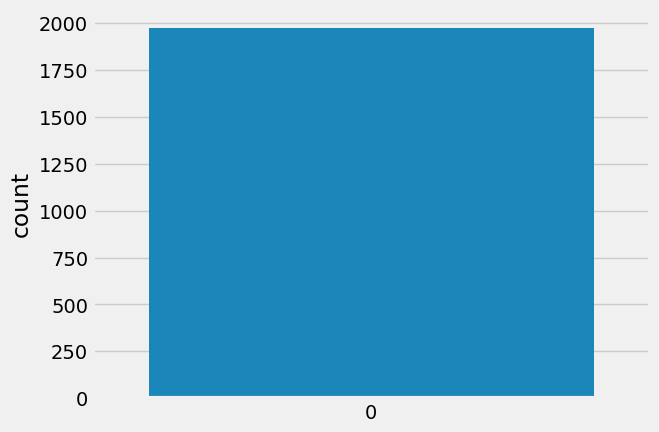

In [ ]:
sns.countplot(df['YDate'])

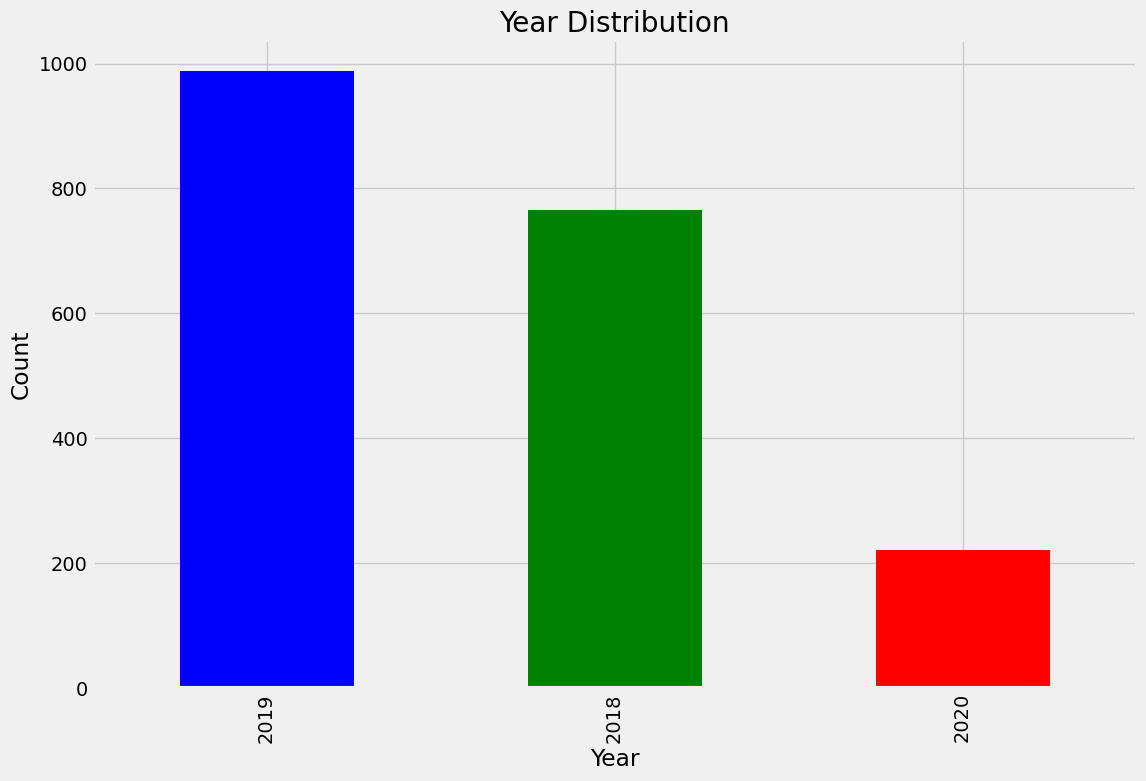

In [ ]:
# Plot and visualize the counts of sentiment analysis
plt.figure(figsize=(12,8))
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
df['YDate'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])

plt.show()